In [1]:
##-----Library Imports------##
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVR, LinearSVR
from sklearn.feature_selection import f_regression, mutual_info_regression, VarianceThreshold, SelectKBest, chi2, RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel


In [2]:
##--Set parameters for dataset--##
remove_textual = 1

In [3]:
##-----STEP ONE: Import Data-----##
data_path = "2-Feature Engineering - All Present.csv" #update which data we use
df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
df.head(10)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62,ZA,South Africa,-33.94739,18.47600,1,21,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,moderate,0,0,1,1,0,0,0.610000,6.493754,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320
1,13044,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,Very centrally situated and walking distance t...,A lot of big attractions are within walking di...,Guests will have access to their own private r...,Barry and Mina will be around to ensure you ha...,We expect our guests to be well behaved. Only ...,2009-11-02,We have been running multi Award Winning Jambo...,within an hour,100%,0.0,5.0,1.0,0.0,115.0,125,ZA,South Africa,-33.90771,18.40535,1,3,Hotel room,2,1.0,1.0,1.0,Real Bed,"TV,Wifi,Air conditioning,Breakfast,Free street...",2105.0,0.000000,0.000000,2,0.0,3,30,1,3,30,30,1.1,30.0,1,0,0,0,0,2,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0,5,0,0,0,0.020000,7.652071,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1459.786779
2,15007,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 6 and has all necessary ameni...,Welcome to our self-catering beach-front famil...,none,"Bloubergstrand is a lovely, cosy suburb near C...",Please note we do not provide beach towels at ...,We're located about 25 minutes drive out on th...,Guests have access to the full self-catering h...,"Ingrid, our booking manager, will meet you and...",Please ensure that arrangements are made for y...,2009-12-01,Proud to

In [4]:
##----Drop textual feature if specified----##

#drop textual columns 
non_numerical_columns = ['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_since', 'host_about', 
        'host_response_time', 'host_listings_count', 'calculated_host_listings_count', 'country_code', 'id', 'country', 'room_type', 'bed_type', 
                         'cancellation_policy', 'host_response_rate', 'amenities']
if(remove_textual):
    df = df.drop(non_numerical_columns, axis=1)


In [5]:
##----Define input data for feature selection----##
feature_names = list(df.columns)
feature_names.remove('log_price')
feature_names.remove('price')
print(feature_names)

print("No. of features: ", len(feature_names)) 

['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_count_entire', 'host_count_private', 'calculat

In [6]:
##----Scale data----##
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

x = df[feature_names]
y = df["log_price"]

In [7]:
##----HEATMAP DEFINITION----##
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    #sns.set(style="white")
    sns.set(style="white", font_scale=1.4) 

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());
    return f

In [8]:
##----NAIVE FEATURE SELECTION----##
positive_corr = []
negative_corr = []
no_corr = []
for column in x:
    if(df["log_price"].corr(df[column]) > 0.05):
        positive_corr.append(column)
    elif (df["log_price"].corr(df[column]) < -0.05):
        negative_corr.append(column)
    else:
        no_corr.append(column)
    
print("+", positive_corr)
print(len(positive_corr))
print("-", negative_corr) 
print(len(negative_corr))
print("0", no_corr)

+ ['host_identity_verified', 'zipcode', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'maximum_minimum_nights', 'review_scores_rating', 'review_scores_location', 'host_count_entire', 'entire', 'luxury_moderate', 'luxury_super_strict_95', 'strict_14_with_grace_period', 'super_strict_30', 'super_strict_60', 'amenity_scores']
21
- ['latitude', 'longitude', 'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable', 'host_count_private', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'private', 'shared', 'flexible', 'moderate']
12
0 ['host_is_superhost', 'host_has_profile_pic', 'neighbourhood_cleansed', 'is_location_exact', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabili

In [20]:
##----Combine features showing positive and negative correlation----##
chosen_features = positive_corr + negative_corr
print(chosen_features)
print(len(chosen_features))

['host_identity_verified', 'zipcode', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'maximum_minimum_nights', 'review_scores_rating', 'review_scores_location', 'host_count_entire', 'entire', 'luxury_moderate', 'luxury_super_strict_95', 'strict_14_with_grace_period', 'super_strict_30', 'super_strict_60', 'amenity_scores', 'latitude', 'longitude', 'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable', 'host_count_private', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'private', 'shared', 'flexible', 'moderate']
33


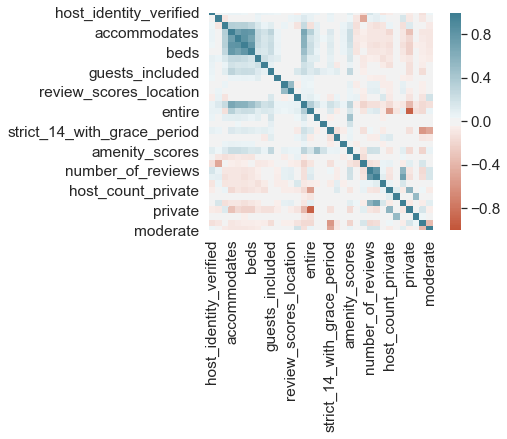

In [21]:
##----Heatmap of naive feature selection----##
#chosen_features.append('log_price')
chosen_features.insert(14, 'log_price')
features = df[chosen_features]
feat_corr = features.corr()
ax = sns.heatmap(
    feat_corr , 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


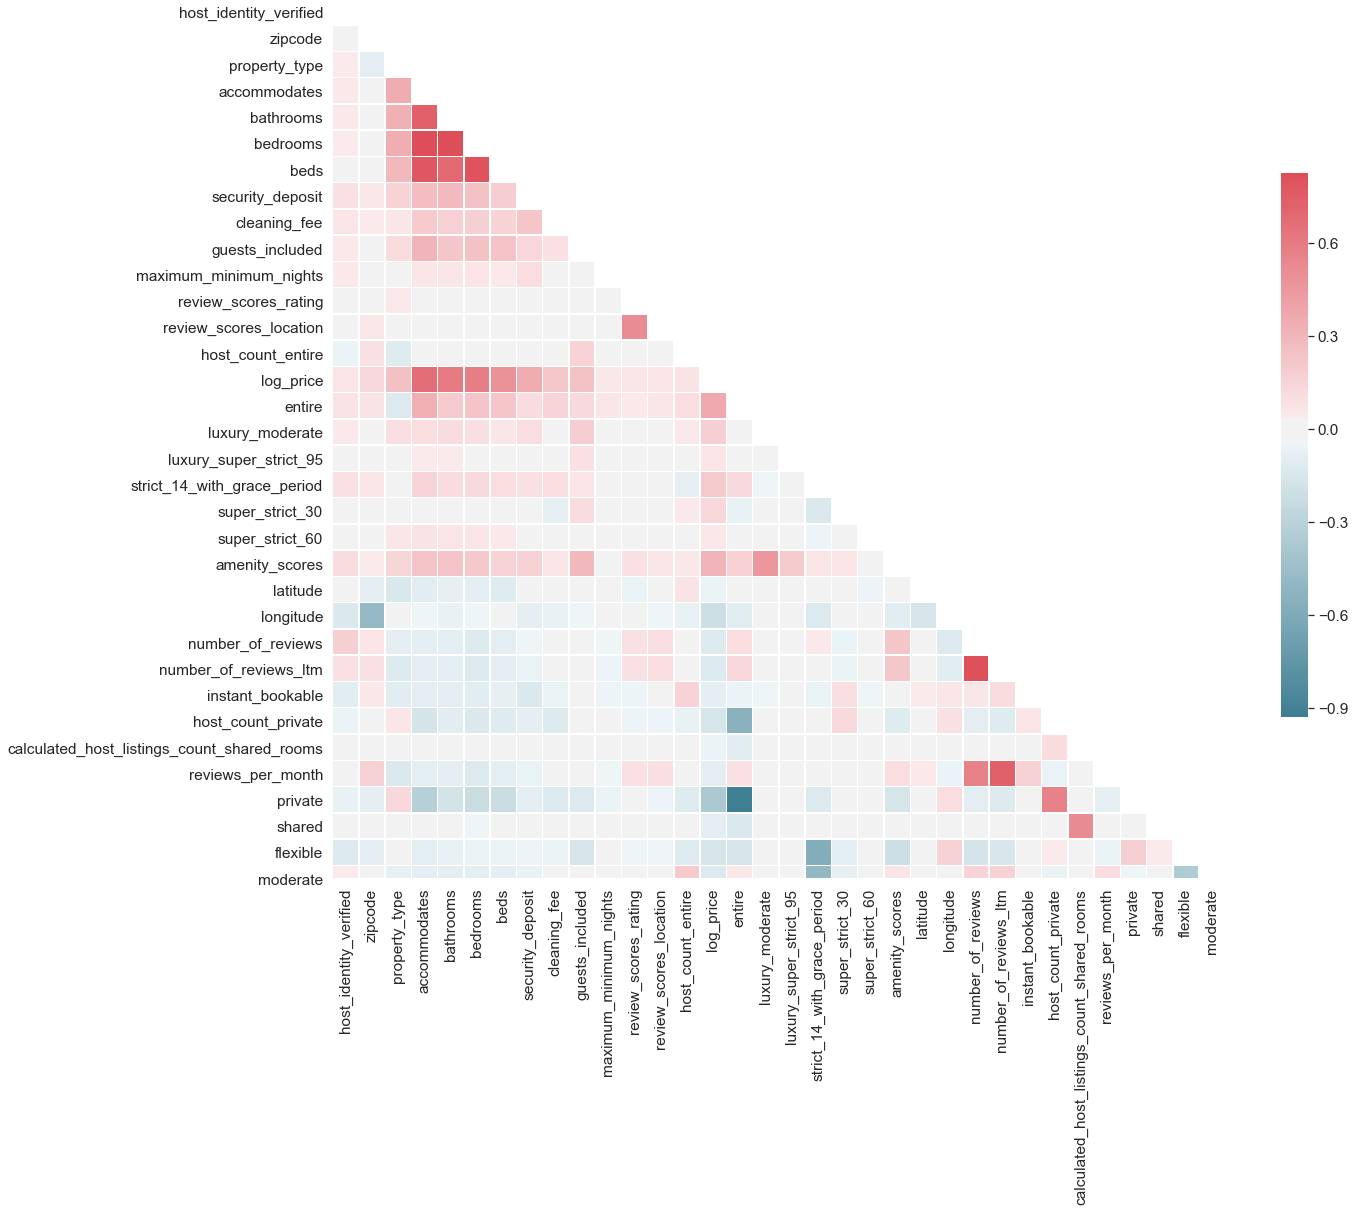

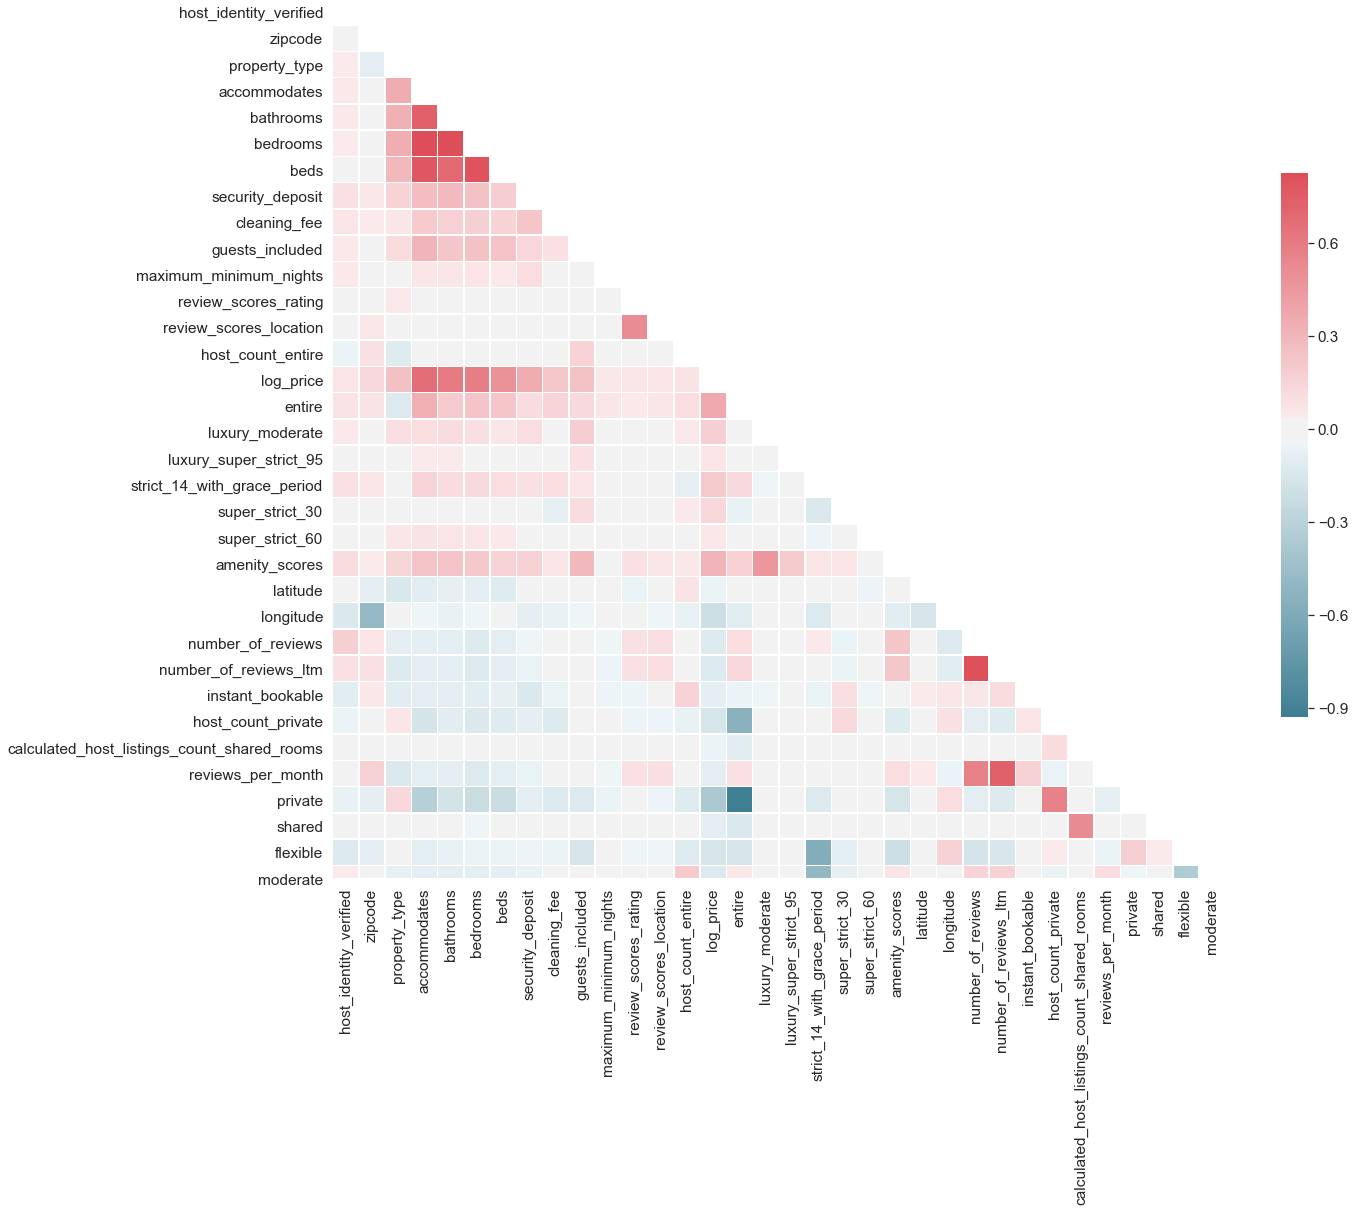

In [22]:
multi_collinearity_heatmap(features, figsize=(20,20))

### Filter Methods###
Considers the relationship between features and the target variable 

In [12]:
##----F TEST----##
#F Test is a statistical test used to compare between models.

#sklearn.feature_selection.f_regression

raw_scores, p_values = f_regression(x, y)
#print(raw_scores) #sort with name and then print importance list 
#print(p_values)


f_test = pd.DataFrame({'Feature':feature_names, 'Score':raw_scores})
#f_test = pd.DataFrame(feature_names, raw_scores)
#f_test.columns = ['feature', 'f_test_score']
#print(f_test)

chosen_features = f_test.sort_values(by=['Score'], ascending=False)
#scores = np.zeros(num_features)
top_20_f_test = chosen_features[:20]
print("Top 20 Features")
print(top_20_f_test["Feature"])


#Drawbacks
# - F-Test checks for and only captures linear relationships between features and labels.
# - Correlation doesn’t capture strong non-linear relationships


Top 20 Features
9                    accommodates
10                      bathrooms
11                       bedrooms
12                           beds
55                        private
53                         entire
13               security_deposit
70                 amenity_scores
8                   property_type
15                guests_included
14                   cleaning_fee
6                       longitude
67    strict_14_with_grace_period
62                luxury_moderate
45             host_count_private
61                       flexible
4                         zipcode
68                super_strict_30
65                       moderate
31          number_of_reviews_ltm
Name: Feature, dtype: object


/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value 

In [13]:
f_test_list = list(top_20_f_test["Feature"])
f_test_list.insert(14, 'log_price')

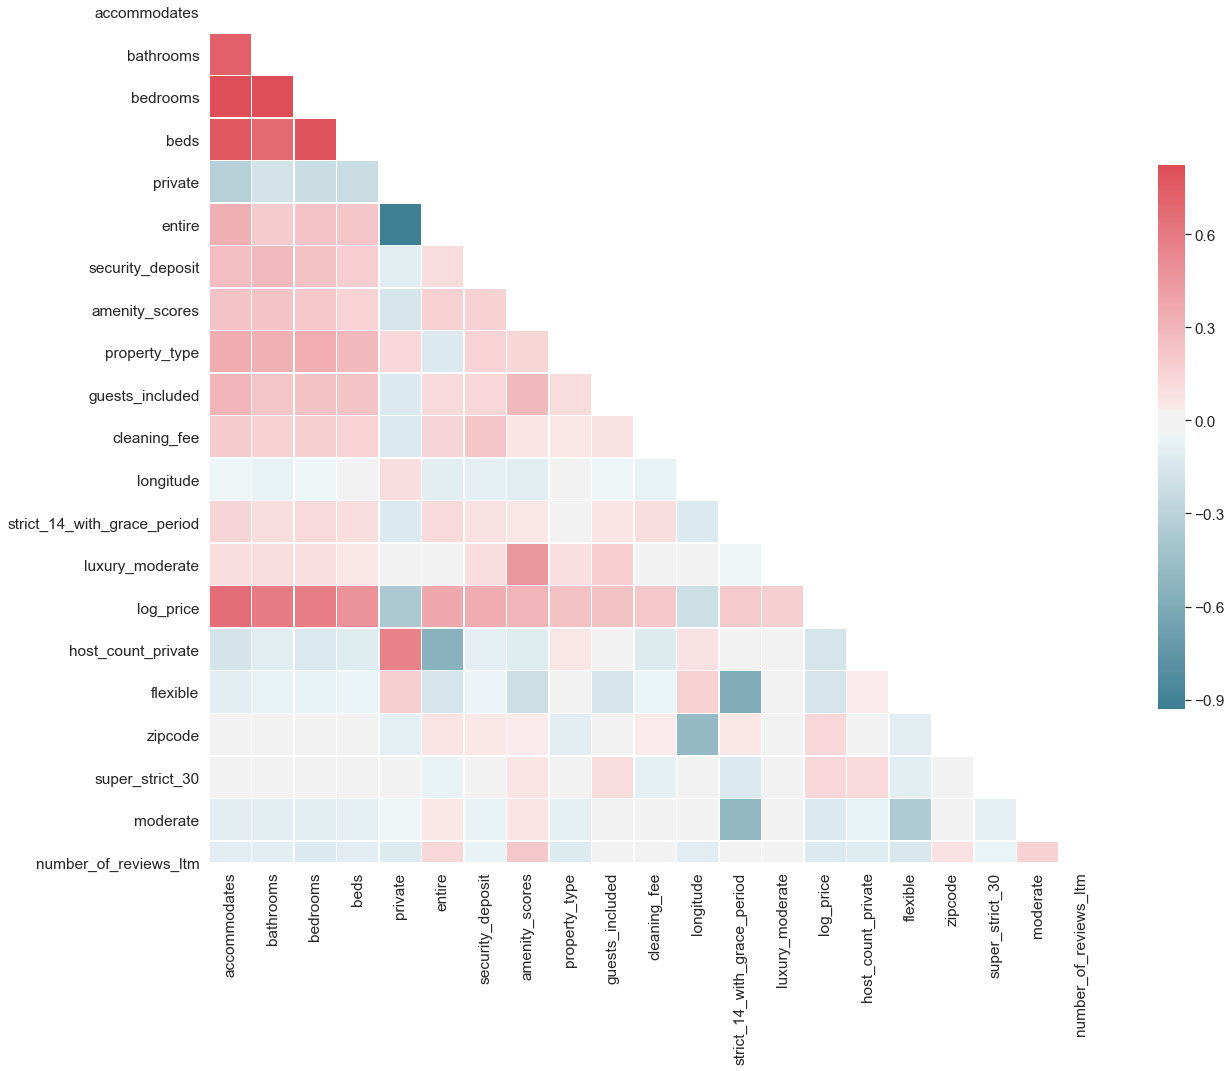

In [14]:
fig = multi_collinearity_heatmap(df[f_test_list], figsize=(20,20))

In [15]:
fig.savefig("corr_top20_f_test_big_font.png", dpi=300, bbox_inches='tight')

In [16]:
##----MUTUAL INFORMATION----##
# - between two variables measures the dependence of one variable to another

#sklearn.feature_selection.mututal_info_regression 

mi = mutual_info_regression(x, y)
#print(mi)
mut_info = pd.DataFrame({'Feature':feature_names, 'Mutual Info':mi})
sorted_mi = mut_info.sort_values(by=['Mutual Info'], ascending=False)
print("Top 20 Features")
print(sorted_mi[:20])

#Advantage of using mutual information over F-Test is,
#it does well with the non-linear relationship between feature and target variable.

Top 20 Features
                   Feature  Mutual Info
9             accommodates     0.363632
11                bedrooms     0.336624
10               bathrooms     0.327657
3   neighbourhood_cleansed     0.319367
44       host_count_entire     0.237907
12                    beds     0.225364
14            cleaning_fee     0.214059
6                longitude     0.212921
8            property_type     0.209378
5                 latitude     0.200538
4                  zipcode     0.165778
13        security_deposit     0.145158
23  minimum_nights_avg_ntm     0.142540
45      host_count_private     0.127309
20  maximum_minimum_nights     0.124502
70          amenity_scores     0.117057
55                 private     0.111313
29        availability_365     0.105892
53                  entire     0.104456
17          minimum_nights     0.098689


In [17]:
top_20 = sorted_mi[:20]
print(top_20["Feature"])

9               accommodates
11                  bedrooms
10                 bathrooms
3     neighbourhood_cleansed
44         host_count_entire
12                      beds
14              cleaning_fee
6                  longitude
8              property_type
5                   latitude
4                    zipcode
13          security_deposit
23    minimum_nights_avg_ntm
45        host_count_private
20    maximum_minimum_nights
70            amenity_scores
55                   private
29          availability_365
53                    entire
17            minimum_nights
Name: Feature, dtype: object


In [18]:
##----VARIANCE THRESHOLD----##
# - removes features with variation below a certain cutoff.

#sklearn.feature_selection.VarianceThreshold

selector = VarianceThreshold(0.5) #0.9 gives 20, 0.5 gives 20, 0.3 gives 22, 0.1 gives 28
X_high_variance = selector.fit_transform(x)

print(df.columns[selector.get_support(indices=True)])
top_30_variance = df.columns[selector.get_support(indices=True)]
print(len(df.columns[selector.get_support(indices=True)]))
#variance_threshold_selector(df, 0.5)


#Disadvantage
#- doesn’t consider the relationship of features with the target variable.

Index(['neighbourhood_cleansed', 'zipcode', 'property_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_accuracy',
       'review_scores_location', 'require_guest_phone_verification',
       'host_count_entire', 'calculated_host_listings_count_shared_rooms',
       'super_strict_30'],
      dtype='object')
32


In [23]:
##----Identify common features----##
#between mutual info and variance
common = list(set(top_20["Feature"]).intersection(top_30_variance)) #23
print(common)
print(len(common))

['accommodates', 'neighbourhood_cleansed', 'property_type', 'bedrooms', 'maximum_minimum_nights', 'bathrooms', 'beds', 'minimum_nights', 'availability_365', 'cleaning_fee', 'zipcode', 'minimum_nights_avg_ntm', 'security_deposit', 'host_count_entire']
14


In [25]:
#between f_test and mutual info
list(set(top_20["Feature"]).intersection(top_20_f_test["Feature"])) #16

['accommodates',
 'zipcode',
 'host_count_private',
 'amenity_scores',
 'bedrooms',
 'bathrooms',
 'beds',
 'entire',
 'private',
 'cleaning_fee',
 'property_type',
 'security_deposit',
 'longitude']

In [26]:
#between f_test and variance
common2 = list(set(top_30_variance).intersection(top_20_f_test["Feature"])) #16
print(common2)
print(len(common2))

['accommodates', 'zipcode', 'bedrooms', 'number_of_reviews_ltm', 'bathrooms', 'beds', 'guests_included', 'super_strict_30', 'property_type', 'security_deposit', 'cleaning_fee']
11


In [27]:
#features common to all three methods
tri_common = list(set(common).intersection(top_20_f_test["Feature"]))
print(tri_common) #8

['accommodates', 'zipcode', 'bedrooms', 'bathrooms', 'beds', 'cleaning_fee', 'property_type', 'security_deposit']


In [29]:
##----Choose f test features----##
df_feature_selected = df[f_test_list]

In [31]:
df_feature_selected.to_csv("4-Feature Selection.csv", index=False) #save selected features to csv

In [32]:
df_sample = df_feature_selected.sample(n=2400, random_state=1) 

In [33]:
df_sample.to_csv("4-Feature Selection - Small Sample 2400.csv", index=False) #save a smaller sample for testing